# View data

In [1]:
SEED = 42

In [ ]:
%pip install nltk

## KOS data

In [3]:
vocabulary = []
with open("data/bag+of+words/vocab.kos.txt", "r") as f:
    for line in f:
        vocabulary.append(line.strip("\n"))

len(vocabulary)

6906

In [4]:
vocabulary

['aarp',
 'abandon',
 'abandoned',
 'abandoning',
 'abb',
 'abc',
 'abcs',
 'abdullah',
 'ability',
 'aboard',
 'abortion',
 'abortions',
 'abraham',
 'abrams',
 'abroad',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'abstain',
 'absurd',
 'abu',
 'abuse',
 'abuses',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidentally',
 'accidents',
 'accomplish',
 'accomplished',
 'accomplishment',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'accusations',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achievements',
 'acknowledge',
 'acknowledged',
 'aclu',
 'act',
 'actblue',
 'acted',
 'acting',
 'action',
 'actions',
 'active',
 'actively',
 'activism',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'acts',
 'actual',
 'adam',
 'adams',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',


In [3]:
import numpy as np

with open("data/bag+of+words/docword.kos.txt", "r") as f:
    n_docs = int(f.readline().strip())
    n_words = int(f.readline().strip())
    n_nonzero_counts = int(f.readline().strip())
    print(n_docs, n_words, n_nonzero_counts)
    counts_matrix = np.zeros((n_docs, n_words))
    for line in f:
        split_line = line.strip().split(" ")
        counts_matrix[int(split_line[0])-1,
                      int(split_line[1])-1] = int(split_line[2])

3430 6906 353160


In [4]:
counts_matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

tfdidf_transformer = TfidfTransformer()

In [6]:
tf_idf_matrix = tfdidf_transformer.fit_transform(counts_matrix)

In [7]:
tf_idf_matrix

<3430x6906 sparse matrix of type '<class 'numpy.float64'>'
	with 353160 stored elements in Compressed Sparse Row format>

## Vocabulary Lemmatization

In [8]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_vocabulary = []

for word in vocabulary:
    lemmatized_word = lemmatizer.lemmatize(word)
    if lemmatized_word != word:
        print(word, lemmatized_word)
    lemmatized_vocabulary.append(lemmatized_word)

print(len(lemmatized_vocabulary), len(set(lemmatized_vocabulary))) #1000 words less -> lower dimension?
print(lemmatized_vocabulary)

abcs abc
abortions abortion
abuses abuse
accidents accident
accounts account
accusations accusation
achievements achievement
actions action
activists activist
activities activity
acts act
adams adam
addresses address
adds add
adjustments adjustment
administrations administration
ads ad
adults adult
advantages advantage
advertisements advertisement
advertisers advertiser
advisers adviser
advocates advocate
affairs affair
affiliates affiliate
agencies agency
agents agent
ages age
agreements agreement
aides aide
aims aim
airwaves airwave
alas ala
alerts alert
alexanders alexander
allegations allegation
alliances alliance
allies ally
alternatives alternative
ambitions ambition
amendments amendment
americans american
americas america
amounts amount
amphibians amphibian
analyses analysis
analysts analyst
answers answer
apologies apology
apologists apologist
appeals appeal
appearances appearance
apples apple
applications application
approaches approach
appropriations appropriation
arabs arab


[nltk_data] Downloading package wordnet to /home/mlynatom/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Dimension Reduction

In [47]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS #try umap?
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [83]:
def reduce_dim(reducer, data, colour=None, cmap=None, verbose=False):
    reduced_matrix = reducer.fit_transform(data)
    if verbose:
        display(reduced_matrix)

    scatter = plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=colour, cmap=cmap, s=2)
    if colour is not None:
        plt.legend(*scatter.legend_elements())

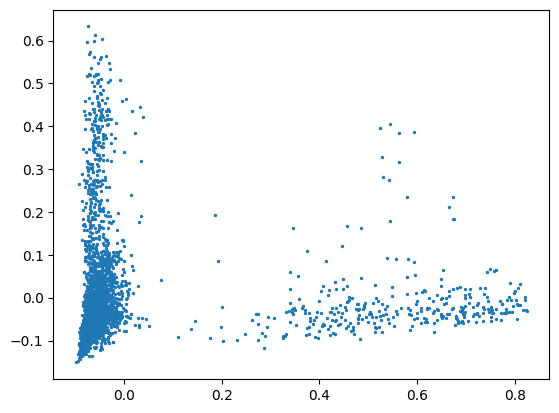

In [84]:
reduce_dim(PCA(n_components=2, svd_solver="arpack"), tf_idf_matrix)

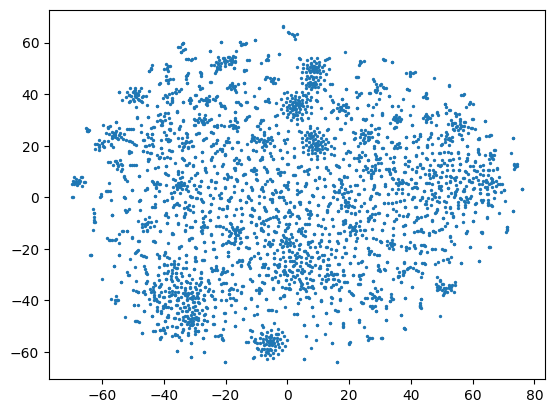

In [54]:
reduce_dim(TSNE(n_components=2, init="random", random_state=SEED), tf_idf_matrix)

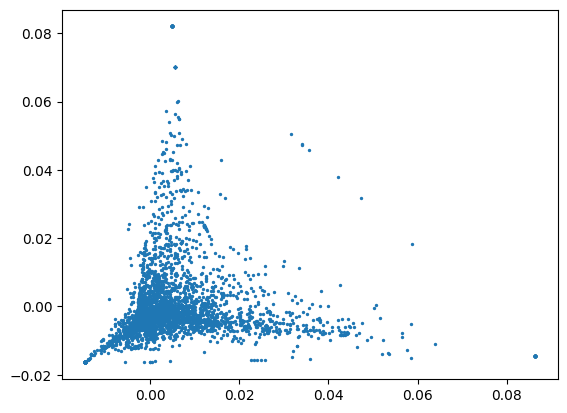

In [62]:
reduce_dim(LocallyLinearEmbedding(n_components=2, random_state=SEED), np.asarray(tf_idf_matrix.todense()))

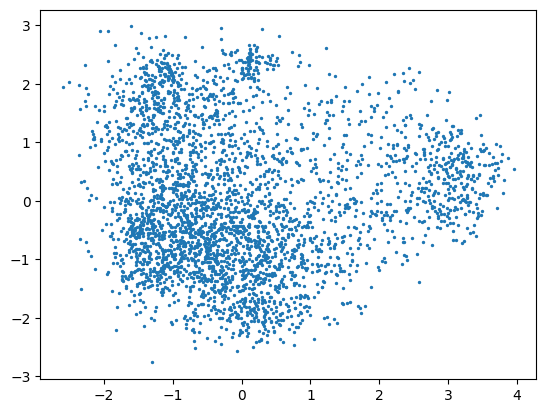

In [56]:
reduce_dim(Isomap(n_components=2), tf_idf_matrix)

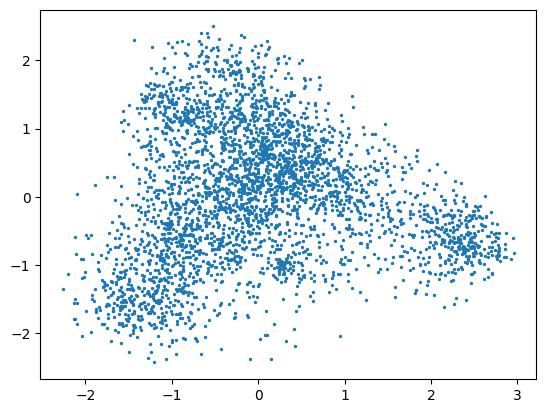

In [57]:
reduce_dim(Isomap(n_components=2, n_neighbors=10), tf_idf_matrix)

## Latent Dirichlet Allocation

Extraction of themes

In [63]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=10, random_state=SEED)

X_new = lda.fit_transform(counts_matrix)

In [64]:
themes = np.argmax(X_new, axis=1)

In [65]:
n_words = 5

for i in range(lda.components_.shape[0]):
    ind =  np.argpartition(lda.components_[i, :], -n_words)[-n_words:]

    words = [vocabulary[word_id] for word_id in ind]
    print(i, words)

0 ['billion', 'tax', 'deficit', 'budget', 'bush']
1 ['governor', 'electoral', 'house', 'poll', 'november']
2 ['primary', 'democratic', 'kerry', 'edwards', 'dean']
3 ['war', 'kerry', 'administration', 'bush', 'president']
4 ['american', 'iraqi', 'war', 'iraq', 'bush']
5 ['time', 'people', 'party', 'political', 'media']
6 ['general', 'percent', 'poll', 'kerry', 'bush']
7 ['house', 'senate', 'republican', 'race', 'democrats']
8 ['republicans', 'texas', 'delay', 'house', 'bush']
9 ['general', 'officials', 'people', 'war', 'military']


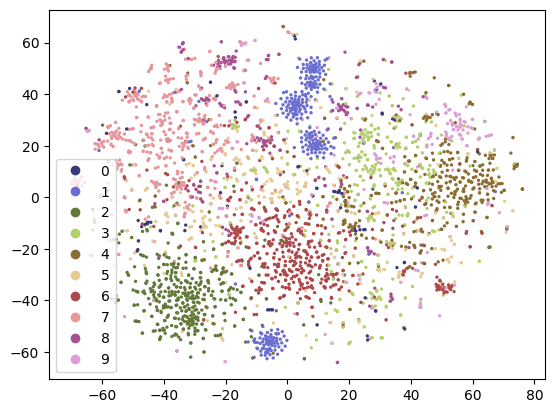

In [85]:
reduce_dim(TSNE(n_components=2, init="random", random_state=SEED), tf_idf_matrix, colour=themes, cmap="tab20b")